In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime

# Generate data

## use sklearn to generate sample data

In [3]:
# parameters
N_SAMPLES = 1000
NOISE = 0.1 # controls noisiness added to circles
FACTOR = 0.5 # controls separation between circles

# generate samples
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=N_SAMPLES, shuffle=True, noise=NOISE, random_state=None, factor=FACTOR)

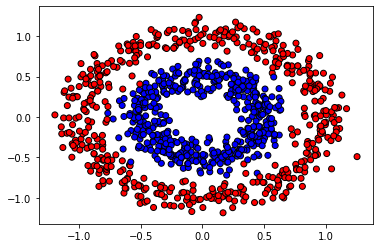

In [6]:
# plot generated sampless
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

## train test split

Training data sample size: 500
Test data sample size: 500


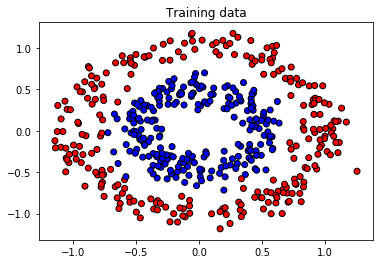

In [7]:
TEST_SIZE = 0.5

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=TEST_SIZE)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.title('Training data');
print('Training data sample size:', len(X_train))
print('Test data sample size:', len(X_valid))

# Build a DL model to classify data

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
N_FEATURES = X_train.shape[1]
print('N_FEATURES:', N_FEATURES)

N_FEATURES: 2


## use Keras' functional API to instantiate a model

In [11]:
## use the functional API

# setup parameters of model
N_UNITS_L1 = 6
N_UNITS_L2 = 1
L1_ACTIVATION = 'tanh'
L2_ACTIVATION = 'sigmoid'

# define inputs
inputs = keras.Input(shape=(N_FEATURES))

# create a single layer
l1 = keras.layers.Dense(units=N_UNITS_L1, activation=L1_ACTIVATION)
l1_output = l1(inputs)

# create an output layer
l2 = layers.Dense(N_UNITS_L2, activation=L2_ACTIVATION)
outputs = l2(l1_output)

# instantiate a model
model = keras.Model(inputs=inputs, outputs=outputs)

# print a summary of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [12]:
## compile model
LEARNING_RATE = 0.1

# compile model
# optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
# loss = keras.losses.BinaryCrossentropy(
#     from_logits=False, label_smoothing=0, reduction="auto", name="binary_crossentropy"
# )
# model.compile(optimizer, loss, metrics=["accuracy"])

# using string arguments seems to work better for some reason...
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
## fit model
BATCH_SIZE = 16
EPOCHS = 100

# fit model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7658 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7566 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7485 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7418 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7303 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7215 - accuracy: 0.5060
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7175 - accuracy: 0.5060
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7139 - accuracy: 0.5080
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.5940
Epoch 83/100
32/32 [==============================] - 0s 889us/step - loss: 0.6619 - accuracy: 0.6080
Epoch 84/100
32/32 [==============================] - 0s 910us/step - loss: 0.6613 - accuracy: 0.6000
Epoch 85/100
32/32 [==============================] - 0s 948us/step - loss: 0.6607 - accuracy: 0.6080
Epoch 86/100
32/32 [==============================] - 0s 914us/step - loss: 0.6601 - accuracy: 0.6060
Epoch 87/100
32/32 [==============================] - 0s 956us/step - loss: 0.6595 - accuracy: 0.6120
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.6020
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6100
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.6260
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6260
Epo

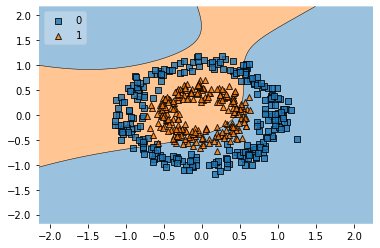

In [15]:
# plot train data + boundaries
from mlxtend.plotting import plot_decision_regions
fig = plot_decision_regions(X=X_train, y=y_train.astype(np.integer).flatten(), clf=model, legend=2)

# use tensor board to visualize model training

In [18]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [26]:
# Clear any logs from previous runs
!rm -rf ./logs/

# parameters
EPOCHS = 400
BATCH_SIZE = 16

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# setup tensorboard callback
callbacks = [tensorboard_callback]

# train model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/400
32/32 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9720
Epoch 2/400
32/32 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9720
Epoch 3/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1422 - accuracy: 0.9720
Epoch 4/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.9720
Epoch 5/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9720
Epoch 6/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9720
Epoch 7/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9720
Epoch 8/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9720
Epoch 9/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.9720
Epoch 10/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9700
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9720
Epoch 81/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9700
Epoch 82/400
32/32 [==============================] - ETA: 0s - loss: 0.1215 - accuracy: 0.93 - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9700
Epoch 83/400
32/32 [==============================] - 0s 984us/step - loss: 0.1320 - accuracy: 0.9700
Epoch 84/400
32/32 [==============================] - 0s 975us/step - loss: 0.1318 - accuracy: 0.9720
Epoch 85/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9720
Epoch 86/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9700
Epoch 87/400
32/32 [==============================] - 0s 993us/step - loss: 0.1314 - accuracy: 0.9700
Epoch 88/400
32/32 [==============================] - 0s 946us/step - loss: 0.1314 - accuracy: 0.9700
Epoch 89/400
32/32 [==============================] - 0s 974us/

32/32 [==============================] - 0s 978us/step - loss: 0.1241 - accuracy: 0.9700
Epoch 161/400
32/32 [==============================] - 0s 935us/step - loss: 0.1241 - accuracy: 0.9700
Epoch 162/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9700
Epoch 163/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.9700
Epoch 164/400
32/32 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9700
Epoch 165/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9700
Epoch 166/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9700
Epoch 167/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.9700
Epoch 168/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.9700
Epoch 169/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9700


32/32 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9700
Epoch 241/400
32/32 [==============================] - 0s 997us/step - loss: 0.1175 - accuracy: 0.9700
Epoch 242/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9700
Epoch 243/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9700
Epoch 244/400
32/32 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9700
Epoch 245/400
32/32 [==============================] - 0s 837us/step - loss: 0.1172 - accuracy: 0.9700
Epoch 246/400
32/32 [==============================] - 0s 921us/step - loss: 0.1171 - accuracy: 0.9700
Epoch 247/400
32/32 [==============================] - 0s 972us/step - loss: 0.1171 - accuracy: 0.9700
Epoch 248/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9700
Epoch 249/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9

32/32 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.9700
Epoch 321/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.9700
Epoch 322/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9700
Epoch 323/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9700
Epoch 324/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9700
Epoch 325/400
32/32 [==============================] - 0s 988us/step - loss: 0.1118 - accuracy: 0.9700
Epoch 326/400
32/32 [==============================] - 0s 999us/step - loss: 0.1117 - accuracy: 0.9700
Epoch 327/400
32/32 [==============================] - 0s 974us/step - loss: 0.1117 - accuracy: 0.9700
Epoch 328/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9700
Epoch 329/400
32/32 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.970

32/32 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9700


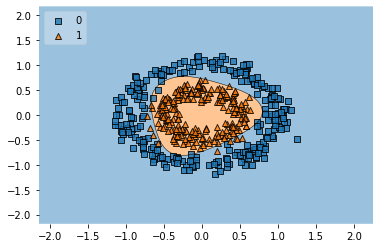

In [27]:
# plot train data + boundaries
from mlxtend.plotting import plot_decision_regions
fig = plot_decision_regions(X=X_train, y=y_train.astype(np.integer).flatten(), clf=model, legend=2)

In [28]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 37599), started 0:03:29 ago. (Use '!kill 37599' to kill it.)